In [127]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
from data import transforms
from PIL import Image
import torch
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
img_size=640
interpolation='bilinear'

In [129]:
fill_color = transforms.resolve_fill_color("mean", transforms.IMAGENET_DEFAULT_MEAN)


In [137]:
image_tfl = [
    #transforms.RandomRotation(rotation=90),
    transforms.ColorTransform(brightness=(0.8,1.5), contrast=(0.8, 1.2), hue=(-0.1, 0.1)),
    transforms.RandomFlip(horizontal=True, prob=0.5),
    transforms.RandomResizePad(target_size=img_size, interpolation=interpolation, scale=(0.5,3.), fill_color=fill_color, repeat=10),
    transforms.ImageToNumpy()
]

In [138]:
image_tf = transforms.Compose(image_tfl)

In [139]:
image_name = "./test_imgs/aug_test.png"


In [140]:
im = Image.open(image_name).convert('RGB')

In [141]:
im.size

(1920, 1080)

In [142]:
np_img = np.array(im, dtype=np.uint8)
np_img = np.moveaxis(np_img, 2, 0)
#torch_img = torch.from_numpy(np_img).to(dtype=torch.float32)


{'bbox': array([[88.89681515, 73.89681515, 97.78649666, 82.78649666]]), 'cls': array([1])}
{'bbox': array([[110.92353178,  60.92353178, 122.01588496,  72.01588496]]), 'cls': array([1])}
{'bbox': array([[73.19704322, 65.19704322, 80.51674754, 72.51674754]]), 'cls': array([1])}
{'bbox': array([[62.83053593, 62.83053593, 69.11358953, 69.11358953]]), 'cls': array([1])}
{'bbox': array([[  85.58873338, 1382.00423371,  113.44760672, 1409.86310705]]), 'cls': array([1])}
{'bbox': array([[87.17302315, 10.17302315, 95.89032546, 18.89032546]]), 'cls': array([1])}
{'bbox': array([[  2.74955877, 707.37124959,  19.62451465, 724.24620546]]), 'cls': array([1])}
{'bbox': array([[134.34899776, 894.46648099, 148.08389754, 908.20138077]]), 'cls': array([1])}
{'bbox': array([[ 111.32262594, 2073.74232046,  146.75488853, 2109.17458305]]), 'cls': array([1])}
{'bbox': array([[ 101.19532248, 1186.16024104,  121.11485472, 1206.07977329]]), 'cls': array([1])}


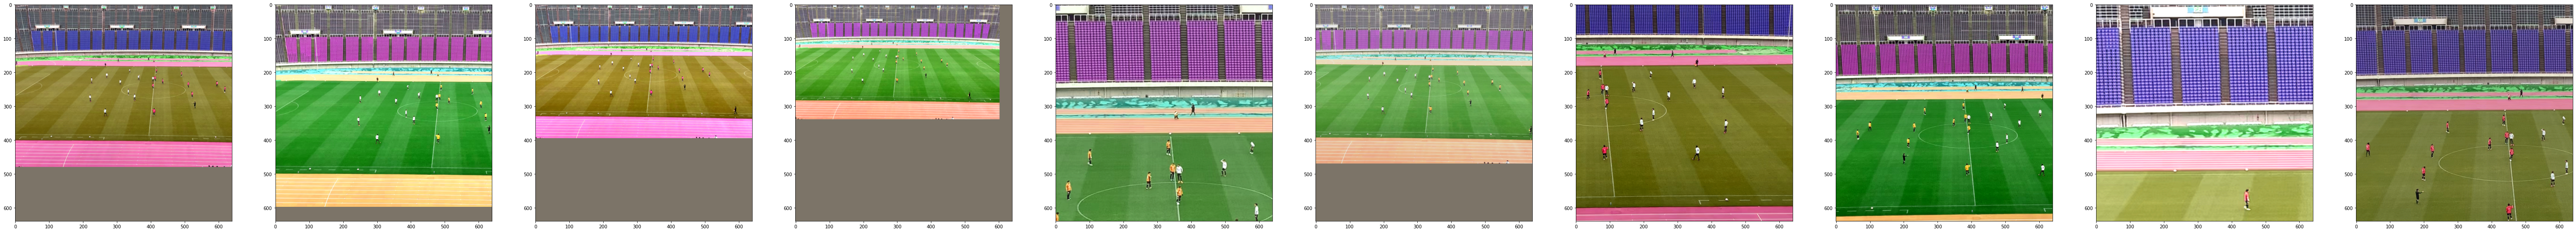

In [143]:
plt.figure(figsize=(100, 200))
for i in range(10):
    aug_img, ann = image_tf(im, {'bbox':np.array([[200,200,220,220]]).astype(np.float64), "cls":np.array([1])})
    #aug_img, ann = image_tf(im, {})
    print(ann)
    aug_img = aug_img.transpose((1,2,0))
    plt.subplot(4, 10, i+1)
    plt.imshow(aug_img)
plt.show()